In [1]:
cd .. 

/home/jovyan/writing-archive/UCLA-Extension/CSX_450_4/src/2018-W-450-4/02-learning-curves


In [2]:
run __init__.py

In [3]:
run src/load_data.py

In [4]:
!pip install tqdm --quiet

In [5]:
from sklearn.metrics import accuracy_score, f1_score

# Fundamental Question: Who makes more than $50k?

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [7]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42, stratify=labels)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n,
            'f1_train_score' : f1_score(y_samp, train_pred),
            'f1_test_score' : f1_score(y_test, test_pred),
            'accuracy_train_score' : model.score(X_samp, y_samp),
            'accuracy_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

In [8]:
adult_train_df = data['adult']['train']['engineered']
adult_train_target = data['adult']['train']['labels']
(adult_train_df.shape, adult_train_target.shape)

((25071, 103), (25071,))

In [9]:
test_results = {}
percentages = [1,2,3,4,5,7,10,15,20,25,30,40,50,60,70,80,90,100]
for n in tqdm(percentages):
    test_results[n] = run_model(LogisticRegression(), 'logit', n,
                                adult_train_df,
                                adult_train_target)


100%|██████████| 18/18 [00:01<00:00, 12.81it/s]


In [10]:
test_results = pd.DataFrame(test_results).T.sort_values('n')
test_results

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model_name,n,n_pcnt,test_pred_time,train_pred_time
1,0.822272,0.893617,0.566874,0.722222,2.38419e-07,logit,188,1,1.19209e-06,7.15256e-07
2,0.833599,0.864362,0.607452,0.662252,2.38419e-07,logit,376,2,4.76837e-07,2.38419e-07
3,0.843012,0.859929,0.620663,0.655022,4.76837e-07,logit,564,3,9.53674e-07,4.76837e-07
4,0.845246,0.863032,0.623739,0.66881,4.76837e-07,logit,752,4,7.15256e-07,4.76837e-07
5,0.847798,0.852128,0.634763,0.653367,4.76837e-07,logit,940,5,7.15256e-07,9.53674e-07
7,0.846362,0.861702,0.63061,0.67029,4.76837e-07,logit,1316,7,9.53674e-07,7.15256e-07
10,0.849394,0.859574,0.641882,0.659794,7.15256e-07,logit,1880,10,9.53674e-07,7.15256e-07
15,0.848437,0.851418,0.642857,0.648195,4.76837e-07,logit,2820,15,9.53674e-07,4.76837e-07
20,0.848437,0.845745,0.646314,0.64891,4.76837e-07,logit,3760,20,7.15256e-07,7.15256e-07
25,0.850511,0.847234,0.652834,0.646305,4.76837e-07,logit,4700,25,7.15256e-07,2.38419e-07


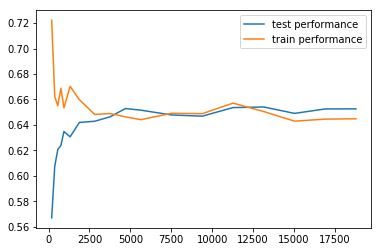

In [11]:
plt.plot(test_results.n, test_results.f1_test_score, label='test performance')
plt.plot(test_results.n, test_results.f1_train_score, label='train performance')
plt.legend()